# Supply Chain network

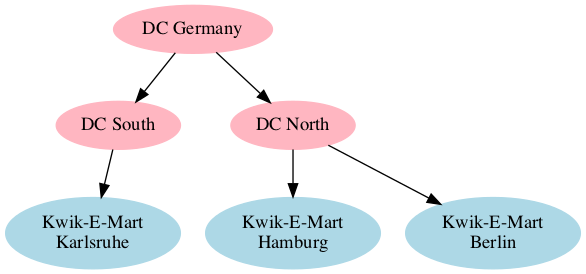

In [29]:
from graphviz import Digraph


sc = Digraph(comment='Supply Chain - super simplified')
with sc.subgraph() as locs:
    locs.attr(rank='same')
    locs.node_attr.update(color='lightblue', style='filled')
    locs.node("L1", "Kwik-E-Mart\nKarlsruhe")
    locs.node("L2", "Kwik-E-Mart\nHamburg")
    locs.node("L3", "Kwik-E-Mart\nBerlin")

    
with sc.subgraph() as dcs:
    dcs.node_attr.update(color='lightpink', style='filled')
    dcs.node("DC1", "DC South")
    dcs.node("DC2", "DC North")
    dcs.node("DC3", "DC Germany")


sc.edge("DC1", "L1")
sc.edge("DC2", "L2")
sc.edge("DC2", "L3")

sc.edge("DC3", "DC2")
sc.edge("DC3", "DC1")


import IPython.display as display
display.Image(sc.render(format='png'))

# Supply Chain network with vendor orders

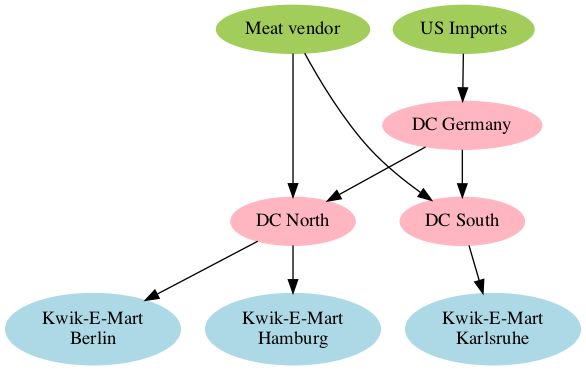

In [4]:
sc = Digraph(comment='Supply Chain - super simplified')

with sc.subgraph() as locs:
    locs.attr(rank='same')
    locs.node_attr.update(color='lightblue', style='filled')
    locs.node("L1", "Kwik-E-Mart\nKarlsruhe")
    locs.node("L2", "Kwik-E-Mart\nHamburg")
    locs.node("L3", "Kwik-E-Mart\nBerlin")

    
with sc.subgraph() as dcs:
    dcs.node_attr.update(color='lightpink', style='filled')
    dcs.node("DC1", "DC South")
    dcs.node("DC2", "DC North")
    dcs.node("DC3", "DC Germany")


sc.edge("DC1", "L1")
sc.edge("DC2", "L2")
sc.edge("DC2", "L3")

sc.edge("DC3", "DC2")
sc.edge("DC3", "DC1")


with sc.subgraph() as vendors:
    vendors.attr(rank='same')
    vendors.node_attr.update(color='darkolivegreen3', style='filled')
    vendors.node("V1", "Meat vendor")
    vendors.node("V2", "US Imports")
#     vendors.node("V3", "Toilet Emergency Supplier")


sc.edge("V2", "DC3")
sc.edge("V1", "DC2")
sc.edge("V1", "DC1")
# sc.edge("V3", "L1")
# sc.edge("V3", "L2")
# sc.edge("V3", "L3")


import IPython.display as display
display.Image(sc.render(format='png'))

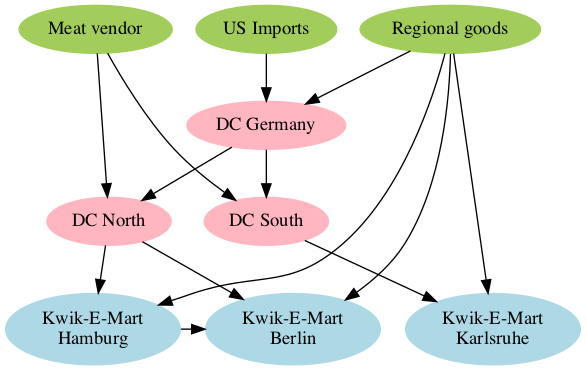

In [6]:
sc = Digraph(comment='Supply Chain - super simplified')

with sc.subgraph() as locs:
    locs.attr(rank='same')
    locs.node_attr.update(color='lightblue', style='filled')
    locs.node("L1", "Kwik-E-Mart\nKarlsruhe")
    locs.node("L2", "Kwik-E-Mart\nHamburg")
    locs.node("L3", "Kwik-E-Mart\nBerlin")

    
with sc.subgraph() as dcs:
    dcs.node_attr.update(color='lightpink', style='filled')
    dcs.node("DC1", "DC South")
    dcs.node("DC2", "DC North")
    dcs.node("DC3", "DC Germany")


sc.edge("DC1", "L1")
sc.edge("DC2", "L2")
sc.edge("DC2", "L3")

sc.edge("DC3", "DC2")
sc.edge("DC3", "DC1")


with sc.subgraph() as vendors:
    vendors.attr(rank='same')
    vendors.node_attr.update(color='darkolivegreen3', style='filled')
    vendors.node("V1", "Meat vendor")
    vendors.node("V2", "US Imports")
    vendors.node("V3", "Regional goods")


sc.edge("V2", "DC3")
sc.edge("V1", "DC2")
sc.edge("V1", "DC1")
sc.edge("V3", "DC3")
sc.edge("V3", "L1")
sc.edge("V3", "L2")
sc.edge("V3", "L3")
sc.edge("L2", "L3")


import IPython.display as display
display.Image(sc.render(format='png'))

# Breaking the problem in pieces

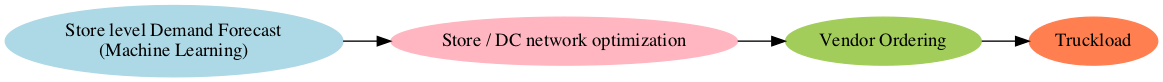

In [14]:
sc = Digraph(comment='Supply Chain - super simplified')
sc.attr(rankdir="LR")

sc.node("LDE", "Store level Demand Forecast\n(Machine Learning)", color='lightblue', style='filled')
sc.node("LSF", "Store / DC network optimization", color='lightpink', style='filled')
sc.node("OO", "Vendor Ordering", color='darkolivegreen3', style='filled')
sc.node("Truckload", "Truckload", color='coral', style='filled')

sc.edge("LDE", "LSF")
sc.edge("LSF", "OO")
sc.edge("OO", "Truckload")

import IPython.display as display
display.Image(sc.render(format='png'))

# In reality this is an ongoing process, day by day

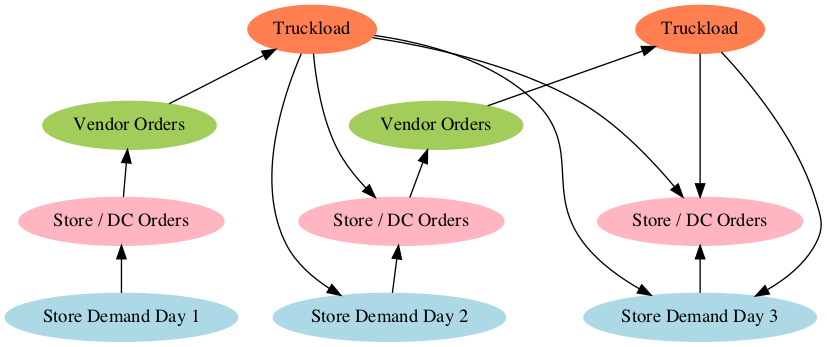

In [34]:
sc = Digraph(comment='Supply Chain - super simplified')
sc.attr(rankdir="BT")

with sc.subgraph() as demand:
    demand.attr(rank='same')
    demand.node_attr.update(color='lightblue', style='filled')
    demand.node("D1", "Store Demand Day 1")
    demand.node("D2", "Store Demand Day 2")
    demand.node("D3", "Store Demand Day 3")

    
with sc.subgraph() as dcs:
    dcs.attr(rank='same')
    dcs.node_attr.update(color='lightpink', style='filled')
    dcs.node("LSF1", "Store / DC Orders")
    dcs.node("LSF2", "Store / DC Orders")
    dcs.node("LSF3", "Store / DC Orders")
    
with sc.subgraph() as oo:
    oo.node_attr.update(color='darkolivegreen3', style='filled')
    oo.node("OO1", "Vendor Orders")
    oo.node("OO2", "Vendor Orders")

with sc.subgraph() as trucks:
    trucks.node_attr.update(color='coral', style='filled')
    trucks.node("Trucks1", "Truckload")
    trucks.node("Trucks2", "Truckload")

sc.edge("D1", "LSF1")
sc.edge("LSF1", "OO1")
sc.edge("OO1", "Trucks1")
sc.edge("Trucks1", "LSF2")
sc.edge("Trucks1", "D2")
sc.edge("Trucks1", "D3")
sc.edge("Trucks1", "LSF3")

sc.edge("D2", "LSF2")
sc.edge("LSF2", "OO2")
sc.edge("OO2", "Trucks2")
sc.edge("Trucks2", "LSF3")
sc.edge("Trucks2", "D3")
sc.edge("D3", "LSF3")

import IPython.display as display
display.Image(sc.render(format='png'))

# Let's start at the beginning - Zoom in

This is effectively running around the clock (sometimes even overlapping) which leaves us with only a few hours / minutes per step every day to close our loop.

The above chain is individual for every product / location combination

Mid sized customer
* 20k Active products
* 500 Stores / Locations

=> 10Mio SKUs (Stock Keeping Units)

* 10Mio Timeseries
* Forecast horizon between 21 and ~400 days
* Historic data up to 10 years
* ~40TB data per customer (denormalized, decompressed) / few hundred GB in parquet


This entire thing is a huge Data Engineering problem...

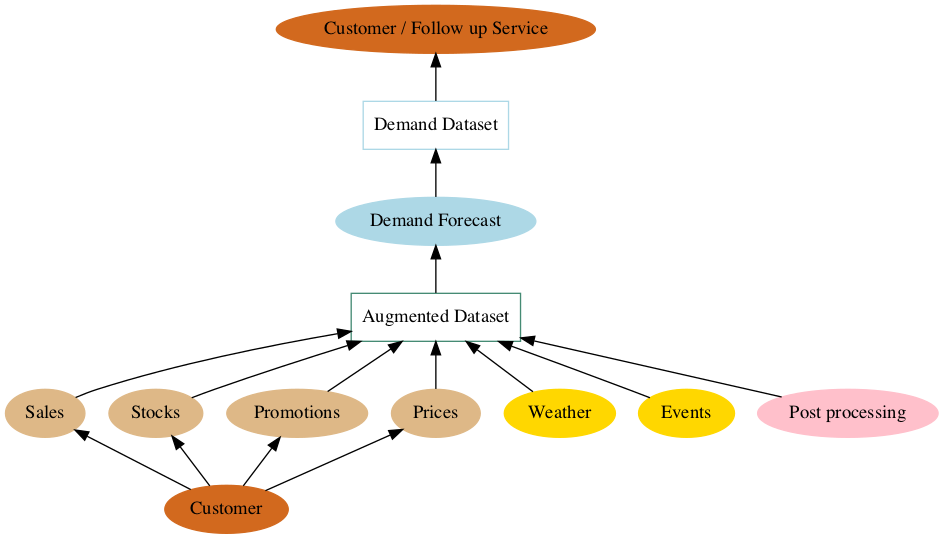

In [1]:
from graphviz import Digraph


sc = Digraph(comment='Supply Chain - super simplified')
sc.attr(rankdir="BT")

sc.node("Demand", "Demand Forecast", color="lightblue" ,style="filled")
sc.node("Core", "Augmented Dataset", color="aquamarine4" , shape="box")
sc.node("DemandDS", "Demand Dataset", color="lightblue", shape="box")


sc.node("Customer", "Customer", color="chocolate" ,style="filled")
sc.node("Customer2", "Customer / Follow up Service", color="chocolate" ,style="filled")


customer_input = ["Sales",  "Stocks", "Promotions", "Prices"]
service_input = ["Weather", "Events"]


factors = customer_input + service_input

with sc.subgraph() as factor_g:
    factor_g.node_attr.update(color="burlywood", style='filled')
    for f in customer_input:
        factor_g.node(f, f)

with sc.subgraph() as services:
    for s in service_input:
        services.node(s, s)
    services.node_attr.update(color="gold" ,style="filled")

sc.node("Post processing", color='pink', style='filled')

for influence in factors:
    sc.edge(influence, "Core")

for c in customer_input:
    sc.edge("Customer", c)
    
sc.edge("Post processing", "Core")
sc.edge("Core", "Demand")
sc.edge("Demand", "DemandDS")
sc.edge("DemandDS", "Customer2")

import IPython.display as display
display.Image(sc.render(format='png'))

# Problem(s)

* Customer data is huge
* Description of this supply chain is very complex (we currently require about ~70 Entities)
* Joining this data properly requires a lot of domain knowledge
* We might want to access this data over and over again (ML forecast, optimization, KPI reports, UI, ...)
* Post processing, data cleansing, etc. should only be done once before everybody interacts with the data

Hardware required for this kind of customer (reminder: mid sized)
* Data is stored in a multi node in-memory relational database
* ~1.5TB RAM
* ~4-5TB of data (fast) storage
* ~200CPUs